In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import seaborn as sn
import matplotlib.pyplot as plt 

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


sn.set_style('darkgrid')
pd.set_option('display.max_colwidth', None)


def data_table(data):
    desc = data
    desc = desc.style.set_properties(**{'text-align': 'left'})
    desc = desc.set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])
    return desc

In [2]:
buildings = pd.read_csv("data/buildings_train.csv")
apartments = pd.read_csv("data/apartments_train.csv")

joined_data = pd.merge(apartments, buildings.set_index('id'), how='left', left_on='building_id', right_index=True)
joined_data.head()                         
#print

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,...,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
0,0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,...,к2.5/2,2021.0,3.0,9.0,0.0,1.0,1.0,1.0,NaN,NaN
1,1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,...,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
2,2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,...,38,2021.0,3.0,15.0,0.0,1.0,1.0,1.0,NaN,NaN
3,3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,...,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
4,4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,...,1к3,2017.0,2.0,15.0,0.0,1.0,1.0,1.0,0.0,0.0


In [3]:
apartments_grouped = joined_data.groupby(['building_id']).mean()
apartments_grouped.head()

corrMatrix = apartments_grouped.corr()
fig = plt.figure(figsize = (34,34))
#sn.heatmap(abs(corrMatrix), annot=True)
#fig.show()

<Figure size 2448x2448 with 0 Axes>

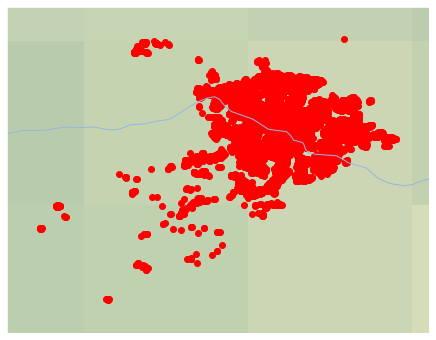

In [4]:
long_min = buildings[['longitude']].min()-.1
long_max = buildings[['longitude']].max()+.1
lat_min = buildings[['latitude']].min() -.1
lat_max = buildings[['latitude']].max()+.1


x = buildings[['longitude']]
y = buildings[['latitude']]

central_lat = 37.62
central_lon = 55.75
extent = [long_min, long_max, lat_min, lat_max]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent(extent)

ax.stock_img()
ax.coastlines()
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
#ax.gridlines()

ax.scatter(x, y, color="red")

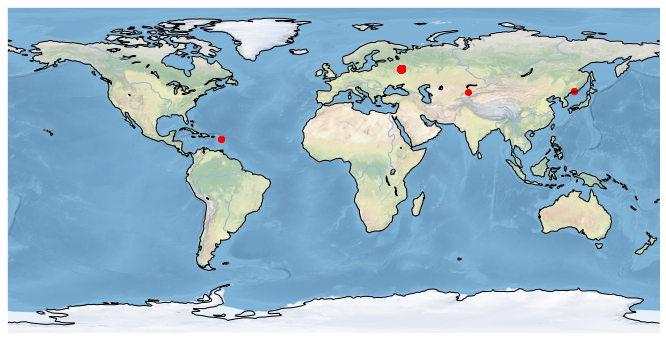

In [5]:
buildings_test = pd.read_csv("data/buildings_test.csv")


long_min = buildings_test[['longitude']].min()-.1
long_max = buildings_test[['longitude']].max()+.1
lat_min = buildings_test[['latitude']].min() -.1
lat_max = buildings_test[['latitude']].max()+.1


x = buildings_test[['longitude']]
y = buildings_test[['latitude']]

extent = [long_min, long_max, lat_min, lat_max]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax.set_extent(extent)

ax.stock_img()
ax.coastlines()
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
#ax.gridlines()

ax.scatter(x, y, color="red")

In [16]:
buildings_all = buildings.append(buildings_test)
print(len(buildings_all.index))


9722


In [20]:
NaNs = buildings_test.isna().sum(axis=0)
#print(NaNs)

NaNs = buildings_all.isna().sum(axis=0)
#print(NaNs)

newNaNs = buildings_all[buildings_all['new'].isna()]
#print(newNaNs)

id                       0
new                    325
latitude                 1
longitude                1
district                14
street                   0
address                  0
constructed            708
material              1710
stories                  0
elevator_without       447
elevator_passenger     447
elevator_service       447
parking               5507
garbage_chute         3691
heating               2081
dtype: int64


KeyError: '`Styler.apply` and `.applymap` are not compatible with non-unique index or columns.'

In [7]:
elevatorNaNs = buildings_test[buildings_test['elevator_without'].isna()]
#data_table(elevatorNaNs)


In [8]:

districtNaNs = buildings_all[buildings_all['district'].isna()]
data_table(districtNaNs)

9722


,id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
5819,4162,1.000000,55.595160,37.741109,nan,23-й км,5к1,2021.000000,3.000000,9.000000,0.000000,1.000000,1.000000,1.000000,nan,1.000000
7,3803,1.000000,nan,nan,nan,пос. Коммунарка,Москва А101 ЖК,2019.000000,2.000000,12.000000,1.000000,1.000000,1.000000,nan,nan,nan
14,1647,0.000000,55.595160,37.741109,nan,23-й км,7к1,2018.000000,nan,25.000000,1.000000,1.000000,1.000000,2.000000,0.000000,nan
182,5667,nan,43.352968,132.759204,nan,улица Центральная,48,nan,nan,2.000000,nan,nan,nan,nan,nan,nan
225,6403,0.000000,55.595160,37.741109,nan,23-й км,11к1,2019.000000,nan,16.000000,0.000000,1.000000,1.000000,0.000000,1.000000,nan
368,7317,1.000000,55.583551,37.711356,nan,25-й км,вл1с1,nan,nan,13.000000,nan,nan,nan,nan,nan,nan
396,2265,0.000000,55.595160,37.741109,nan,23-й км,13к2,2018.000000,nan,25.000000,0.000000,1.000000,1.000000,2.000000,nan,nan
561,926,0.000000,55.921627,37.781578,nan,В мкр,37,1989.000000,2.000000,16.000000,0.000000,1.000000,1.000000,nan,1.000000,0.000000
1108,4412,1.000000,17.141734,-61.790500,nan,Бунинские Луга ЖК,к2/2/2,2021.000000,nan,9.000000,0.000000,1.000000,1.000000,nan,nan,nan
1525,6879,0.000000,55.932127,37.793705,nan,В мкр,30,1975.000000,2.000000,9.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000


In [9]:
wrong_coordinates = buildings_all[~(buildings_all['longitude'].between(36, 38) & buildings_all['latitude'].between(54, 57))]
#print(wrong_coordinates)
data_table(wrong_coordinates)

,id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
7,3803,1.000000,nan,nan,nan,пос. Коммунарка,Москва А101 ЖК,2019.000000,2.000000,12.000000,1.000000,1.000000,1.000000,nan,nan,nan
182,5667,nan,43.352968,132.759204,nan,улица Центральная,48,nan,nan,2.000000,nan,nan,nan,nan,nan,nan
1108,4412,1.000000,17.141734,-61.790500,nan,Бунинские Луга ЖК,к2/2/2,2021.000000,nan,9.000000,0.000000,1.000000,1.000000,nan,nan,nan
2270,4202,nan,42.914700,74.517184,nan,улица 1-я Линия,57,2016.000000,nan,3.000000,nan,nan,nan,nan,nan,nan
2721,8811,0.000000,43.353545,132.768097,nan,улица Центральная,75,2007.000000,nan,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,nan
2838,4636,1.000000,17.141734,-61.790500,nan,Бунинские Луга ЖК,к2/2/1,2021.000000,3.000000,17.000000,1.000000,0.000000,0.000000,nan,0.000000,nan


In [10]:

district_cluster = buildings_all[['longitude', 'latitude', 'district']].drop(buildings_all[buildings_all['district'].isna()].index)
#print(buildings_all['district'].isna().index)
#print(district_cluster)
district_cluster.head()
    

,longitude,latitude,district
0,37.355139,55.518117,11.0
1,37.352156,55.641920,7.0
2,37.386220,55.770011,7.0
3,37.426070,55.739934,7.0
4,37.467994,55.649921,7.0


(55.5, 56.0)

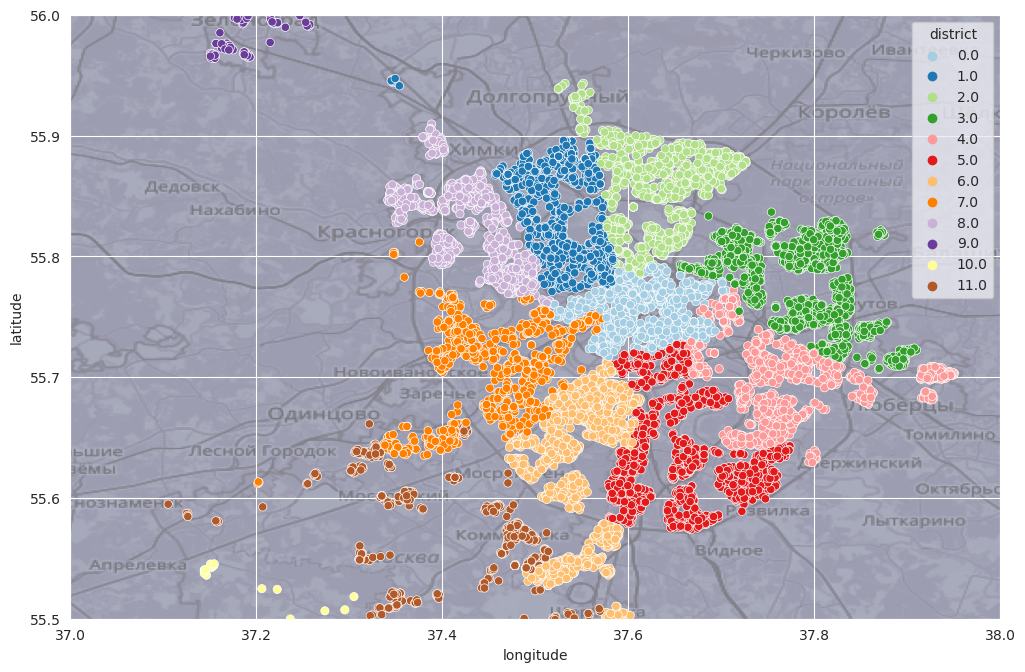

In [11]:
long = district_cluster['longitude']
lat = district_cluster['latitude']
color = district_cluster['district']


plt.figure(figsize=(12, 8), dpi=100)
ax = plt.gca()

backdrop = plt.imread('data/moscow.png')
backdrop = np.einsum('hwc, c -> hw', backdrop, [0, 1, 0, 0]) ** 2

ax.imshow(backdrop, alpha=0.5, extent=[37, 38, 55.5, 56], aspect='auto', cmap='bone', norm=plt.Normalize(0.0, 2))
sn.scatterplot(x=long, y=lat, hue=color, palette='Paired')
ax.set_xlim(37, 38)    # min/max longitude of image 
ax.set_ylim(55.5, 56)  # min/max latitude of image


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

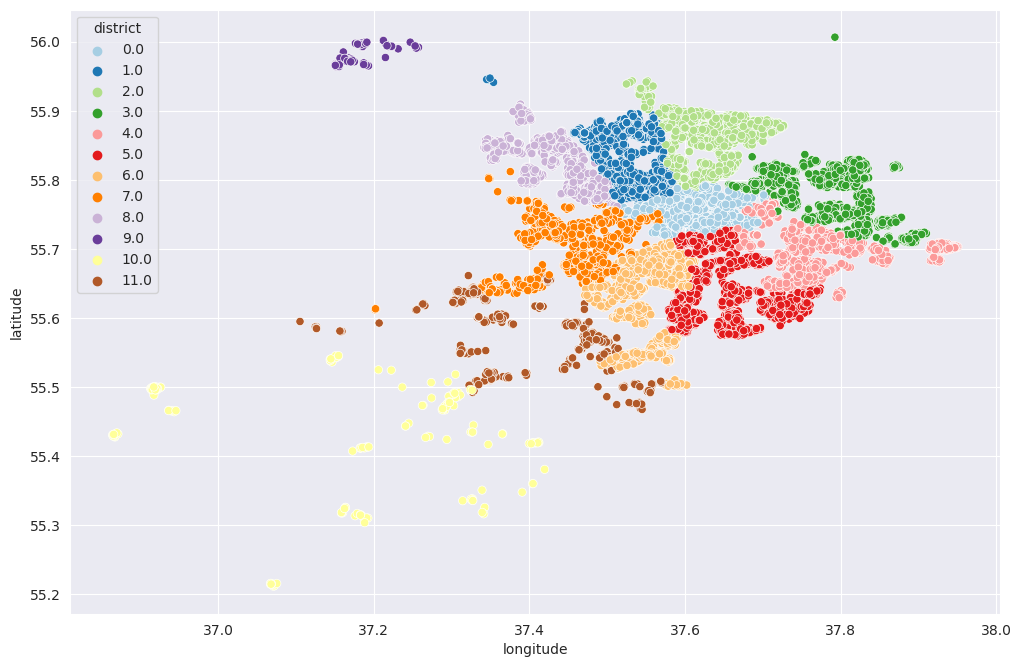

In [12]:
plt.figure(figsize=(12, 8), dpi=100)
ax = plt.gca()
sn.scatterplot(x=long, y=lat, hue=color, palette='Paired')

In [29]:
# compare new min(constructed) with ~new max(constructed)
new_min = buildings_all[buildings_all['new'] == True]['constructed'].min()

old_max = buildings_all[buildings_all['new'] == False]['constructed'].max()
data_table(buildings_all[((buildings_all['constructed'] == new_min) & (buildings_all['new'] == True)) | (buildings_all['constructed'] == old_max) & (buildings_all['new'] == False) ] )
#print(all_new['constructed'])

,id,new,latitude,longitude,district,street,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
5369,5448,0.000000,55.704697,37.945466,4.000000,13-й кв-л,к16,2021.000000,nan,17.000000,0.000000,1.000000,1.000000,nan,nan,nan
13,7066,0.000000,55.553422,37.464284,11.000000,улица Василия Ощепкова,2,2021.000000,3.000000,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,nan
1347,973,1.000000,55.840907,37.515227,1.000000,Михалковская улица,46к3,1917.000000,3.000000,5.000000,1.000000,0.000000,0.000000,nan,nan,0.000000
